# Columns explanations

- battery_power – The total battery capacity of the mobile (in mAh).
- blue – Whether the mobile has Bluetooth or not (1 = Yes, 0 = No).
- clock_speed – The speed of the mobile’s processor (in GHz).
- dual_sim – Whether the phone supports two SIM cards (1 = Yes, 0 = No).
- fc – Megapixels of the front (selfie) camera.
- four_g – Whether the phone supports 4G network (1 = Yes, 0 = No).
- int_memory – Internal storage of the mobile (in GB).
- m_dep – Thickness or depth of the mobile (in cm or mm).
- mobile_wt – Weight of the mobile phone (in grams).
- n_cores – Number of cores in the processor (more cores = faster processing).
- pc – Megapixels of the primary (rear) camera.
- px_height – Screen resolution height (in pixels).
- px_width – Screen resolution width (in pixels).
- ram – RAM size of the mobile (in MB), affects speed and multitasking.
- sc_h – Height of the mobile screen (in cm).
- sc_w – Width of the mobile screen (in cm).
- talk_time – How many hours the phone lasts while calling on full charge.
- three_g – Whether the phone supports 3G network (1 = Yes, 0 = No).
- touch_screen – Whether the phone has a touchscreen (1 = Yes, 0 = No).
- wifi – Whether the phone supports Wi-Fi (1 = Yes, 0 = No).
- price_range – Price category of the phone (0 = Low, 1 = Medium, 2 = High, 3 = Very High).

# Hypotheses

- Higher RAM leads to higher price range.
- Phones with 4G are in higher price categories.
- More internal memory is associated with higher prices.
- Phones with Wi-Fi are more expensive.
- Phones with dual SIM are not necessarily more expensive.
- Phones with higher screen resolution are more expensive.
- RAM has stronger influence on price than processor speed.
- Front camera (fc) doesn’t impact price much.
- Phones with touch screens are more expensive.
- Battery power increases with price.
- Phones with higher number of processor cores are costlier.
- Talk time is not directly related to price.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Mobile Phone Pricing.csv')
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [11]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

- Cheaper phones have less RAM, while expensive phones have more RAM.
-  This shows that RAM has a strong impact on the price of a phone.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_14056\3073238443.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price_range', y='ram', data=df, estimator='mean', ci = None)


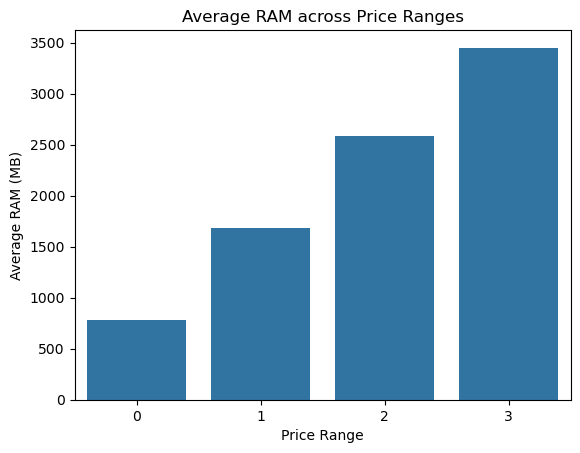

In [17]:
#Higher RAM leads to higher price range.
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='price_range', y='ram', data=df, estimator='mean', ci = None)
plt.title('Average RAM across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Average RAM (MB)')
plt.show()


- 4G phones are available in all price ranges, even the cheapest ones.
→ This means 4G is a common feature and not limited to expensive phones.
- There’s no strong link between 4G availability and phone price.
→ High-priced phones don’t always have more 4G support than low-priced ones.

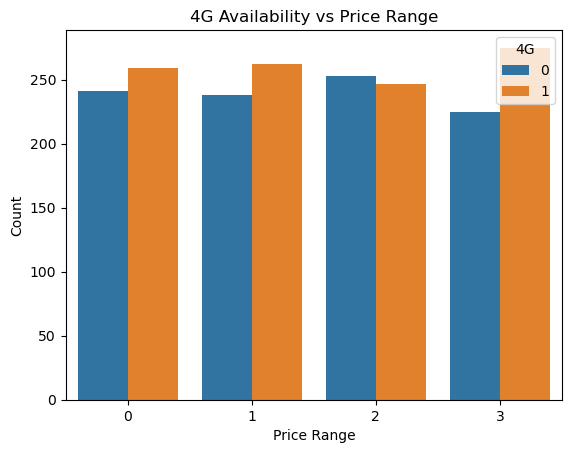

In [19]:
#Phones with 4G are in higher price categories. 
sns.countplot(x='price_range', hue='four_g', data=df)
plt.title('4G Availability vs Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='4G')
plt.show()


- Internal memory increases slightly with price, but the difference is small.
→ Even cheaper phones have around 30GB internal storage on average.
- Internal memory doesn’t strongly affect price range.
→ High price phones don’t always have much more memory than low price ones.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_14056\1080032150.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price_range', y='int_memory', data=df , ci = None)


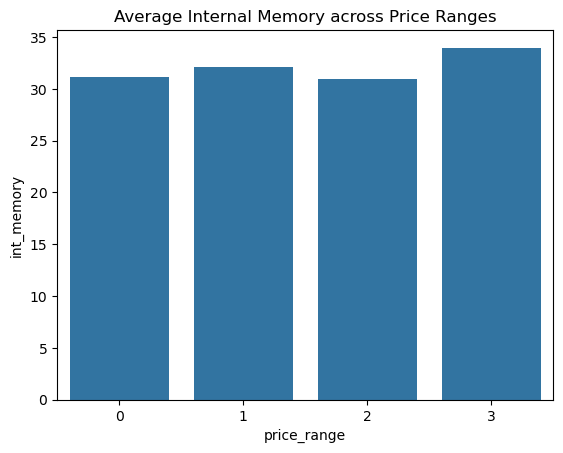

In [23]:
#More internal memory is associated with higher prices.
sns.barplot(x='price_range', y='int_memory', data=df , ci = None)
plt.title('Average Internal Memory across Price Ranges')
plt.show()


- Wi-Fi is almost equally available in all price ranges.
- Both cheap and expensive phones have similar Wi-Fi availability.
- Wi-Fi is not a key factor in deciding phone price.

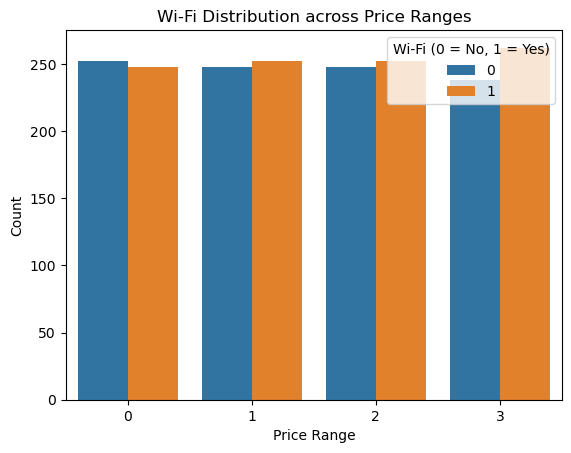

In [61]:
#Phones with Wi-Fi are more expensive.
sns.countplot(x='price_range', hue='wifi', data=df)
plt.title('Wi-Fi Distribution across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Wi-Fi (0 = No, 1 = Yes)')
plt.show()


- Dual SIM support is common across all price ranges.
→ Both cheap and expensive phones often support dual SIM.
- Dual SIM feature doesn't impact phone price much.
→ There's no clear pattern showing more dual SIM phones in higher price ranges.

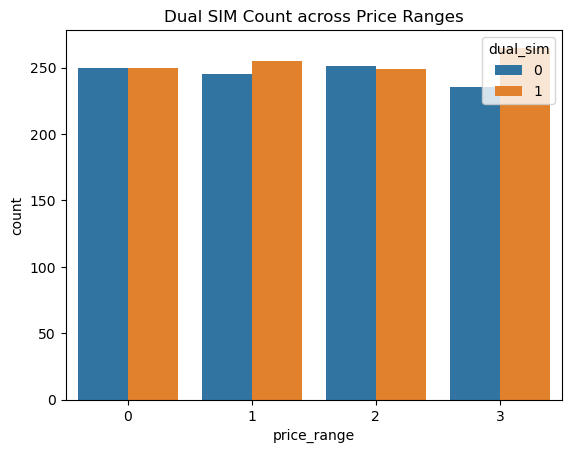

In [31]:
#Phones with dual SIM are not necessarily more expensive.
sns.countplot(x='price_range', hue='dual_sim', data=df)
plt.title('Dual SIM Count across Price Ranges')
plt.show()


- Higher price phones generally have better screen resolution.
→ As the price increases, the total pixels (px_total) also increase.
- There’s a small dip at mid-range prices, but overall resolution rises with price.
→ This shows screen quality is an important feature in high-end phones.

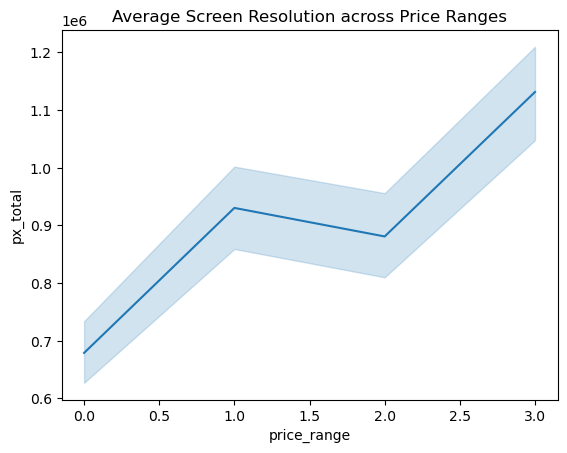

In [33]:
#Phones with higher screen resolution are more expensive.
df['px_total'] = df['px_height'] * df['px_width']
sns.lineplot(x='price_range', y='px_total', data=df, estimator='mean')
plt.title('Average Screen Resolution across Price Ranges')
plt.show()


- RAM increases strongly with price range.
→ Higher price phones have much more RAM, showing it's a key factor in pricing.
- Clock speed stays nearly the same across all price ranges.
→ Clock speed does not have a significant effect on the phone's price.

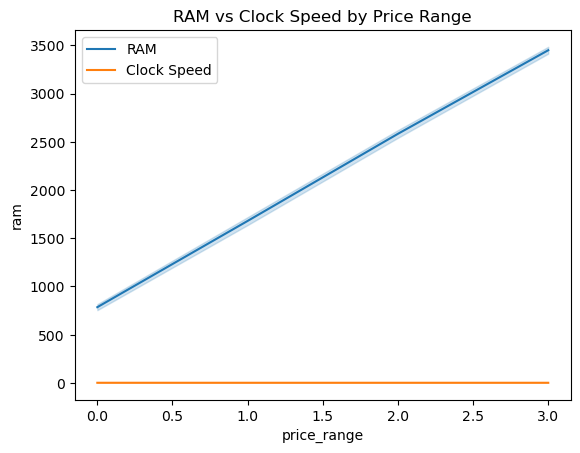

In [35]:
#RAM has stronger influence on price than processor speed.
sns.lineplot(x='price_range', y='ram', data=df, estimator='mean', label='RAM')
sns.lineplot(x='price_range', y='clock_speed', data=df, estimator='mean', label='Clock Speed')
plt.title('RAM vs Clock Speed by Price Range')
plt.legend()
plt.show()


- All price ranges have phones with both low and high front camera megapixels.
→ Even cheaper phones can have high front camera quality.
- There's no strong pattern between front camera MP and price.
→ Front camera megapixels do not significantly impact the phone's price.

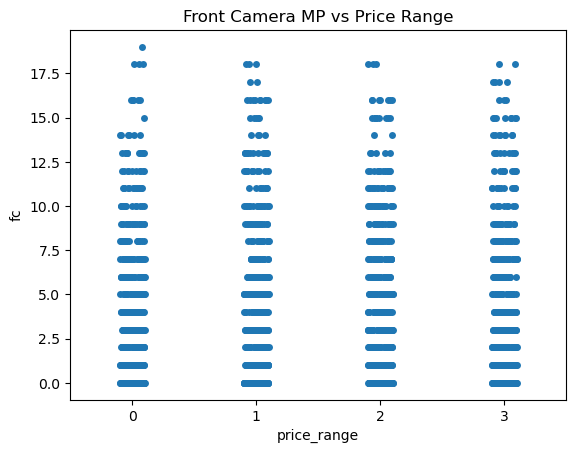

In [37]:
#Front camera (fc) doesn’t impact price much.
sns.stripplot(x='price_range', y='fc', data=df, jitter=True)
plt.title('Front Camera MP vs Price Range')
plt.show()


- Touch screens are present in both cheap and expensive phones.
- Even low-priced phones often have touch screens.
- There is no strong relationship between price and touch screen feature.

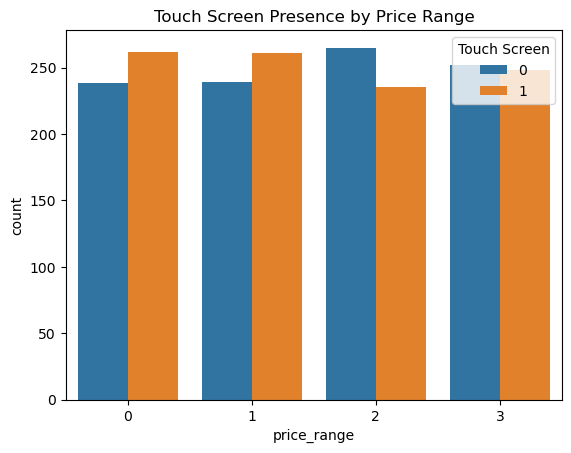

In [39]:
#Phones with touch screens are more expensive.
sns.countplot(x='price_range', hue='touch_screen', data=df)
plt.title('Touch Screen Presence by Price Range')
plt.legend(title='Touch Screen')
plt.show()

    

- Higher-priced phones tend to have stronger battery power, showing that cost often reflects better battery performance.
- Budget phones (lower price range) have the weakest batteries, while mid-range and premium phones offer progressively better battery life.

C:\Users\PRENEEL\AppData\Local\Temp\ipykernel_14056\3605106341.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='price_range', y='battery_power', data=df,ci = None)


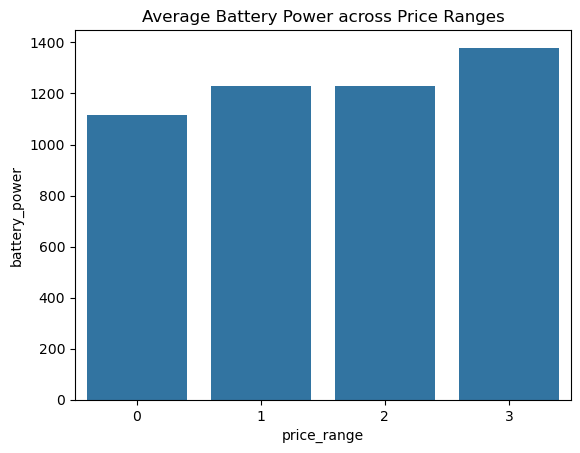

In [63]:
#Battery power increases with price.
sns.barplot(x='price_range', y='battery_power', data=df,ci = None)
plt.title('Average Battery Power across Price Ranges')
plt.show()


- Phones with more processor cores (better performance) are found in higher price ranges, showing that premium phones prioritize stronger processing power.
- Budget phones (price range 0-1) have slightly fewer cores, but the difference in core count across prices isn't drastic, meaning even cheaper phones offer decent processing capability.

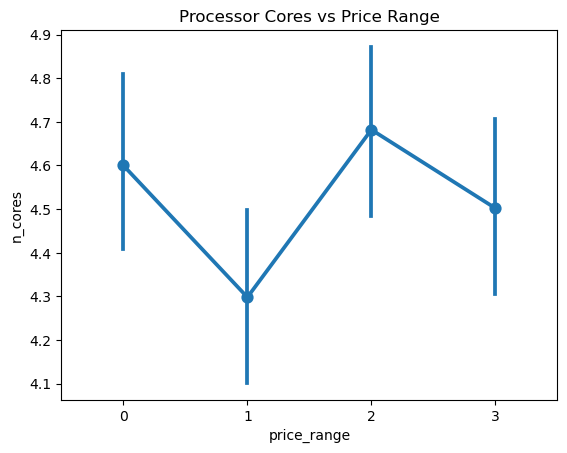

In [43]:
#Phones with higher number of processor cores are costlier.
sns.pointplot(x='price_range', y='n_cores', data=df)
plt.title('Processor Cores vs Price Range')
plt.show()


- Higher-priced phones tend to offer longer talk time, suggesting premium devices prioritize better battery efficiency for calls.
- Budget phones (lower price range) have shorter talk times, but mid-range models show a noticeable improvement in call duration.

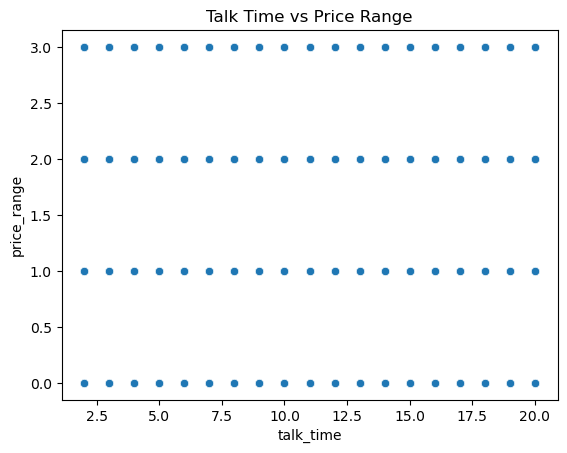

In [57]:
#Talk time is not directly related to price.
sns.scatterplot(x='talk_time', y='price_range', data=df)
plt.title('Talk Time vs Price Range')
plt.show()

# Outliers Detection

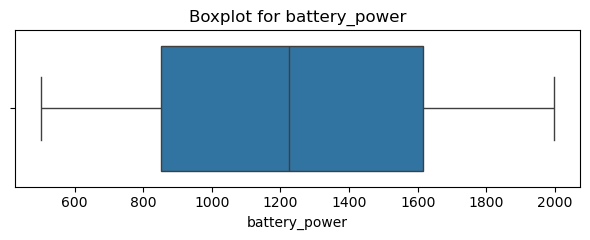

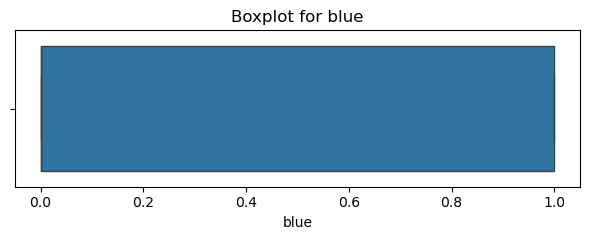

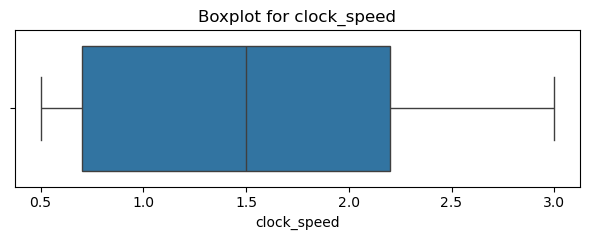

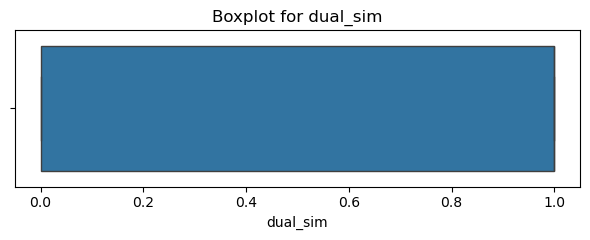

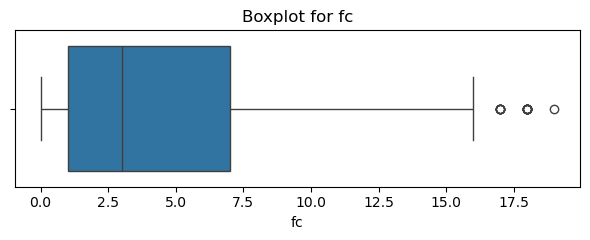

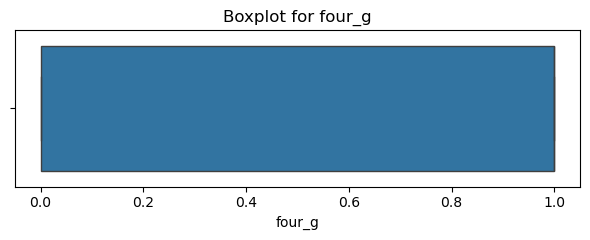

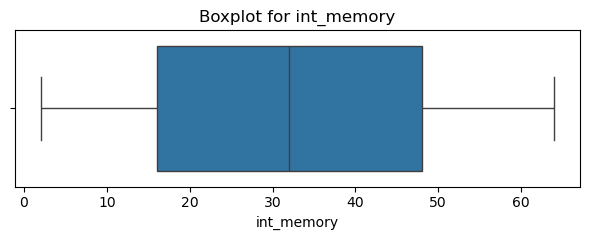

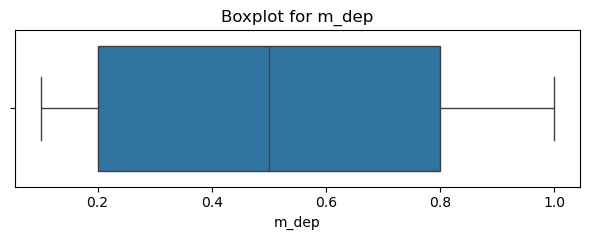

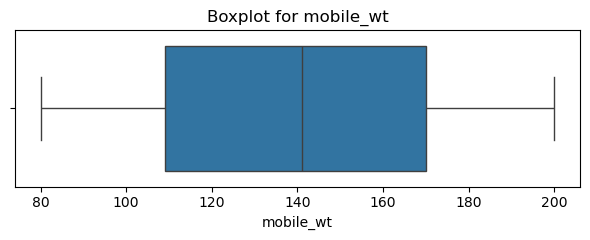

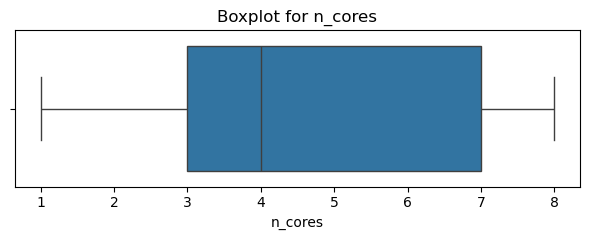

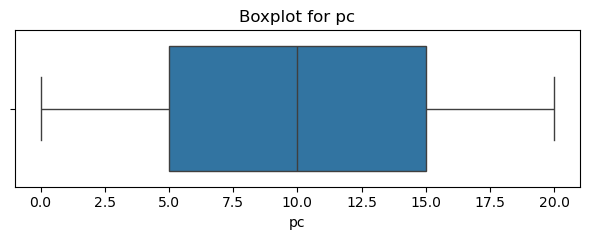

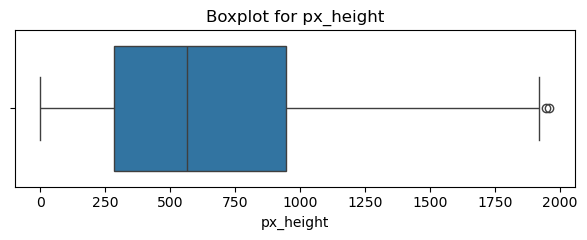

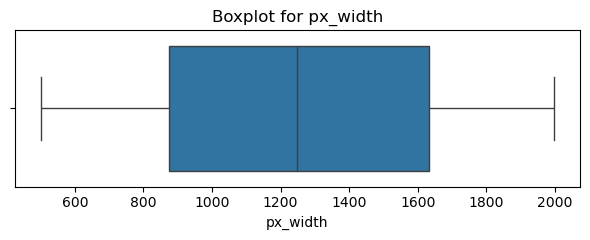

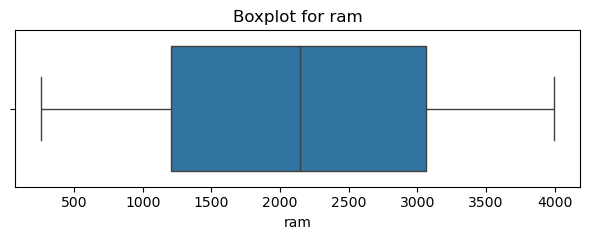

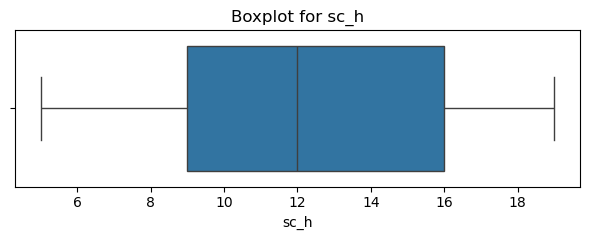

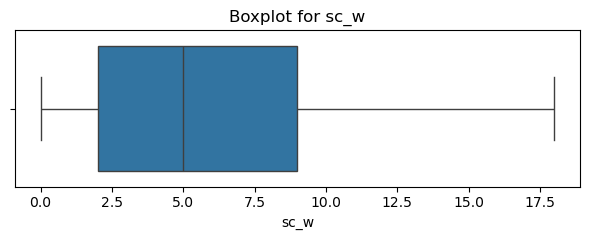

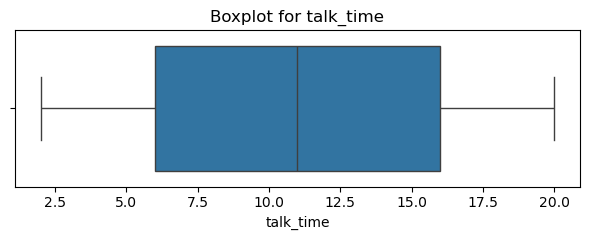

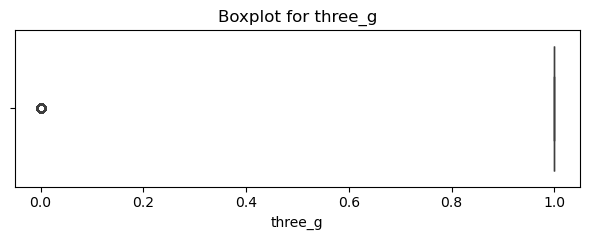

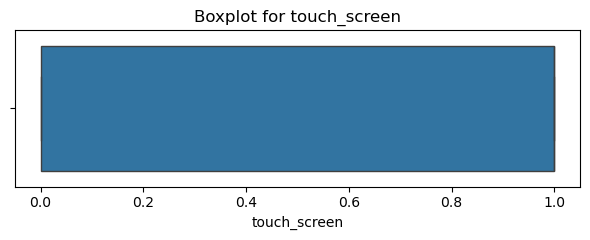

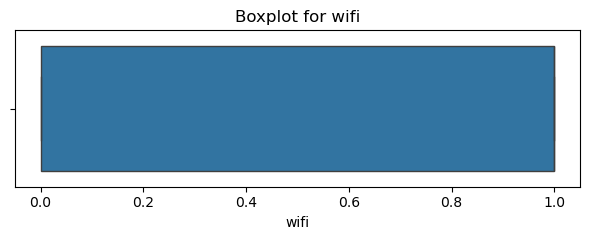

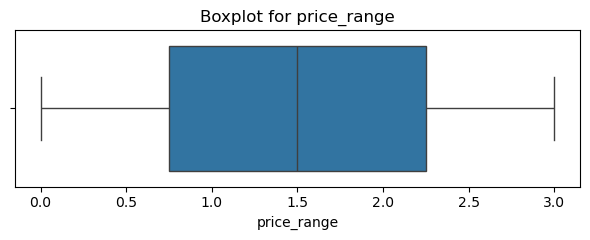

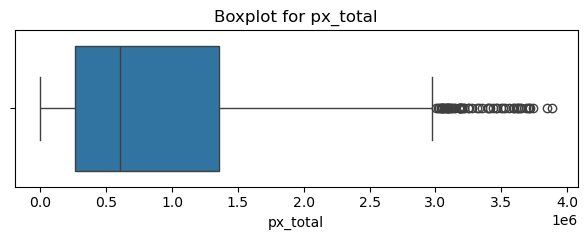

In [53]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()
    plt.show()

# Remove Outliers

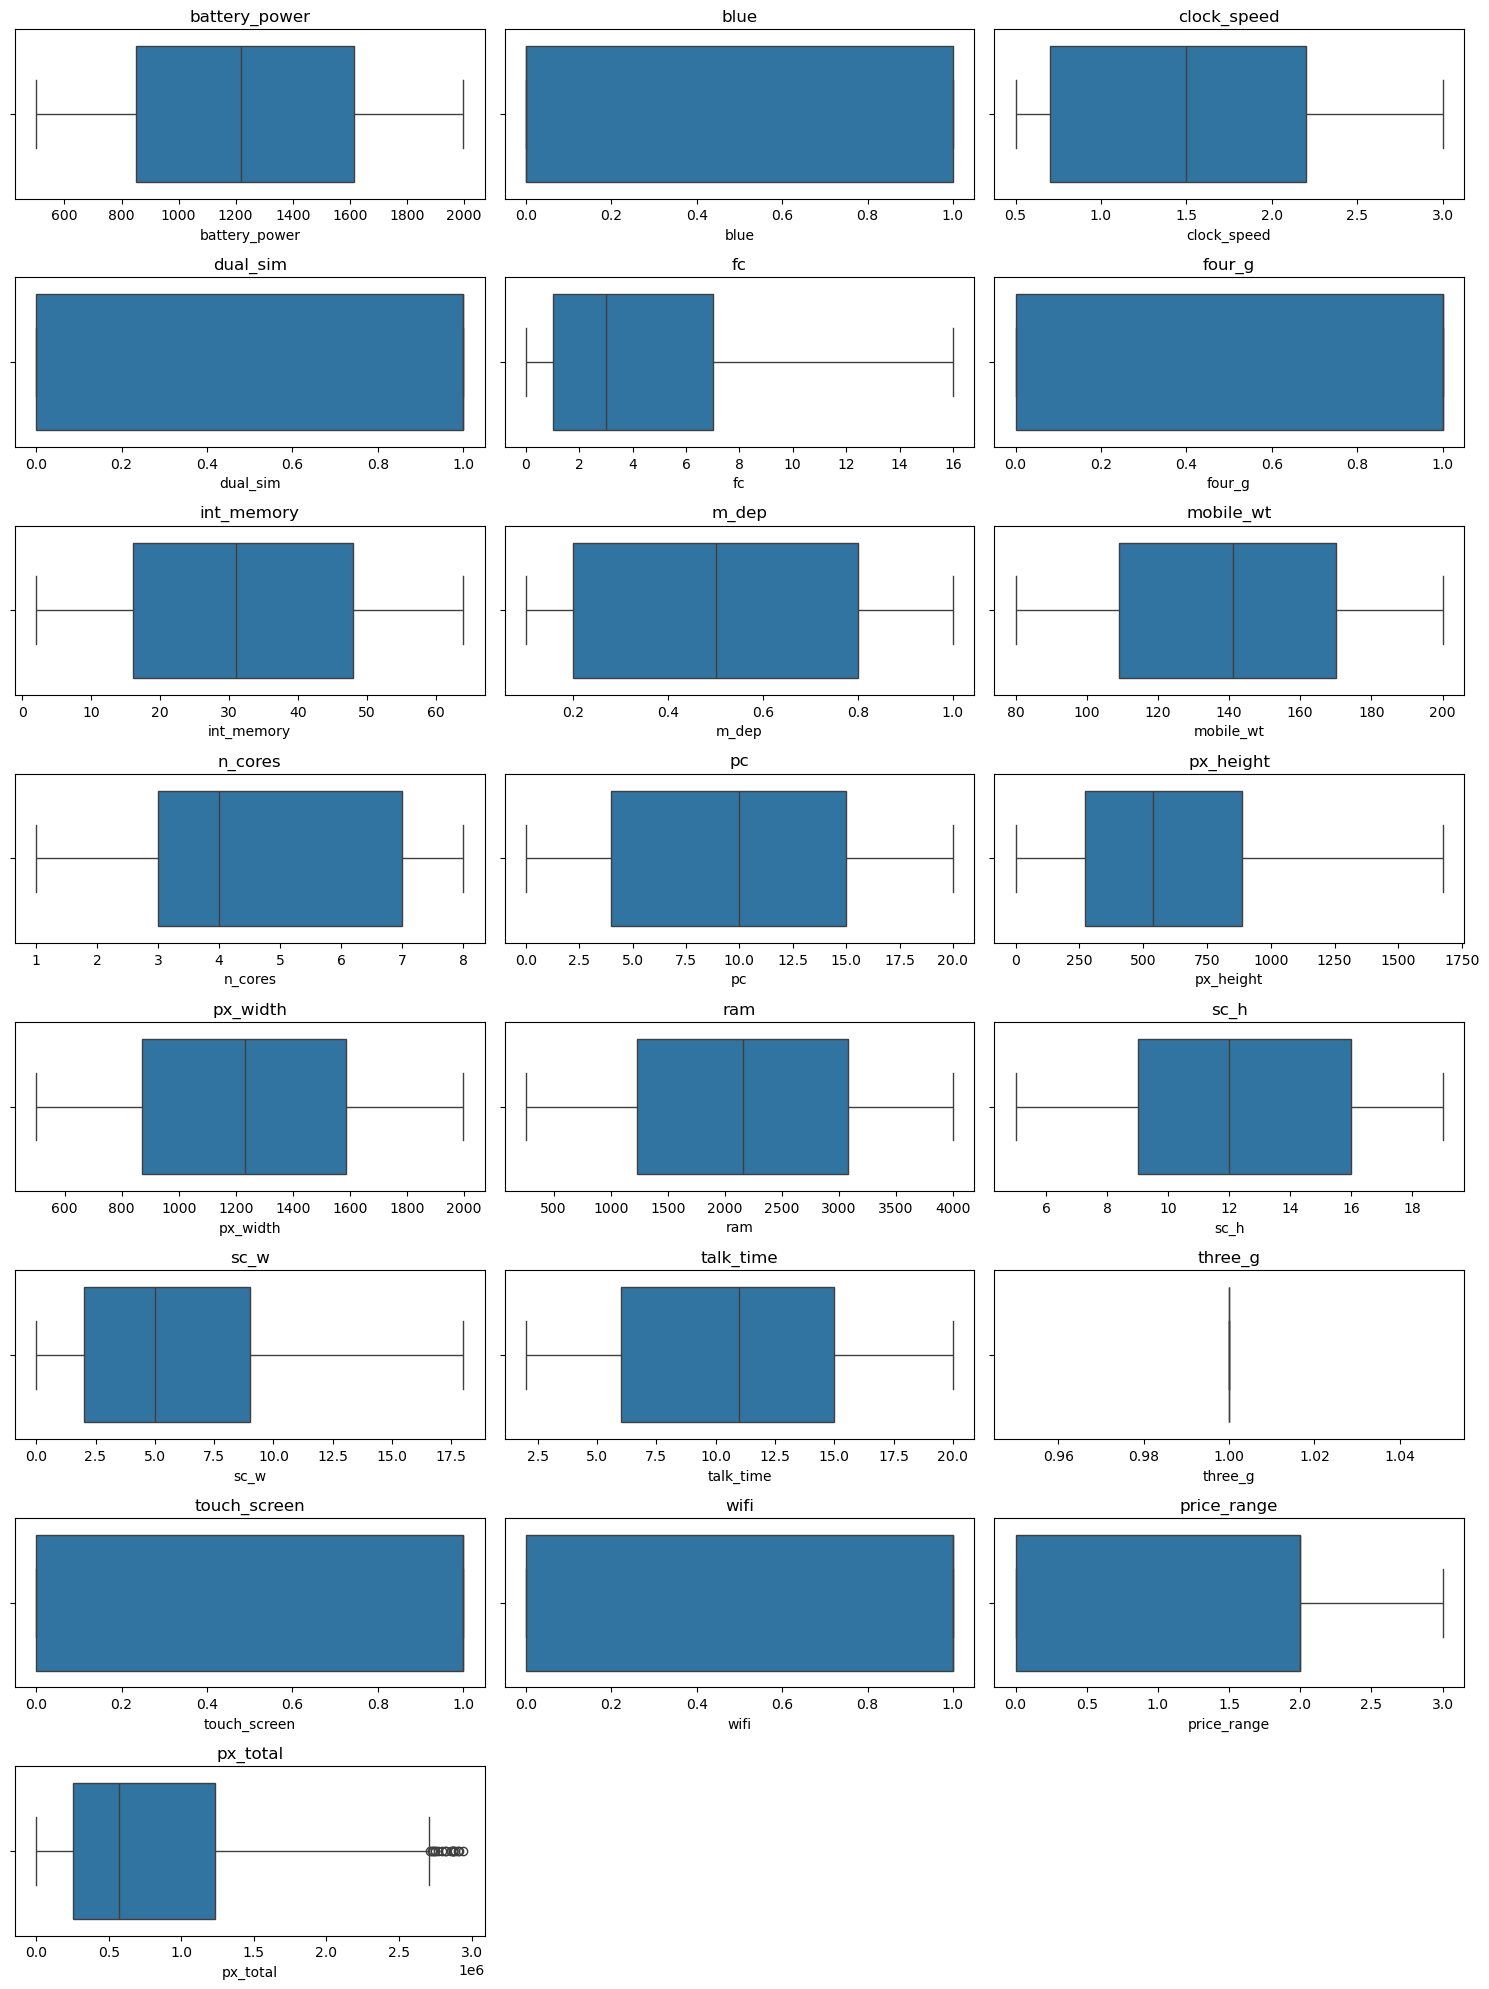

In [59]:
clean_df = df.copy()

numeric_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]

n_cols = 3
n_rows = -(-len(numeric_cols) // n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 2.5))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=clean_df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [69]:
clean_df.head(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
1            1021     1          0.5         1   0       1          53    0.7   
2             563     1          0.5         1   2       1          41    0.9   
3             615     1          2.5         0   0       0          10    0.8   
4            1821     1          1.2         0  13       1          44    0.6   
5            1859     0          0.5         1   3       0          22    0.7   
6            1821     0          1.7         0   4       1          10    0.8   
7            1954     0          0.5         1   0       0          24    0.8   
8            1445     1          0.5         0   0       0          53    0.7   
9             509     1          0.6         1   2       1           9    0.1   
11           1520     1          2.2         0   5       1          33    0.5   

    mobile_wt  n_cores  ...  px_width   ram  sc_h  sc_w  talk_time  three_g  \
1         136        3  ...      1988  2631    17     3          7        1   
2         145        5  ...      1716  2603    11     2          9        1   
3         131        6  ...      1786  2769    16     8         11        1   
4         141        2  ...      1212  1411     8     2         15        1   
5         164        1  ...      1654  1067    17     1         10        1   
6         139        8  ...      1018  3220    13     8         18        1   
7         187        4  ...      1149   700    16     3          5        1   
8         174        7  ...       836  1099    17     1         20        1   
9          93        5  ...      1224   513    19    10         12        1   
11        177        8  ...      1005  3826    14     9         13        1   

    touch_screen  wifi  price_range  px_total  
1              1     0            2   1799140  
2              1     0            2   2167308  
3              0     0            2   2171776  
4              1     0            1   1464096  
5              0     0            1   1660616  
6              0     1            3    387858  
7              1     1            0    588288  
8              0     0            0    322696  
9              0     0            0   1391688  
11             1     1            3    151755  

[10 rows x 22 columns]

- Battery Power & RAM: Higher-priced phones tend to have significantly more RAM (up to 4000MB) and larger batteries (up to 2000mAh), indicating premium devices prioritize performance and endurance.
- Camera & Display: Premium phones feature higher-resolution cameras (px_height and px_width up to 2000) and sharper screens, while budget phones compromise on these specs.
- Connectivity: Most phones, regardless of price, support 3G and 4G (values near 1.0), but higher-end models often include Bluetooth (blue) and Wi-Fi (wifi) as standard.
- Processor & Storage: More expensive phones have more cores (up to 8) and larger internal storage (int_memory up to 64GB), catering to power users.
-Physical Build: Mobile weight (mobile_wt) and thickness (m_dep) vary widely, but premium phones often balance sleek designs (thinner profiles) with durability.

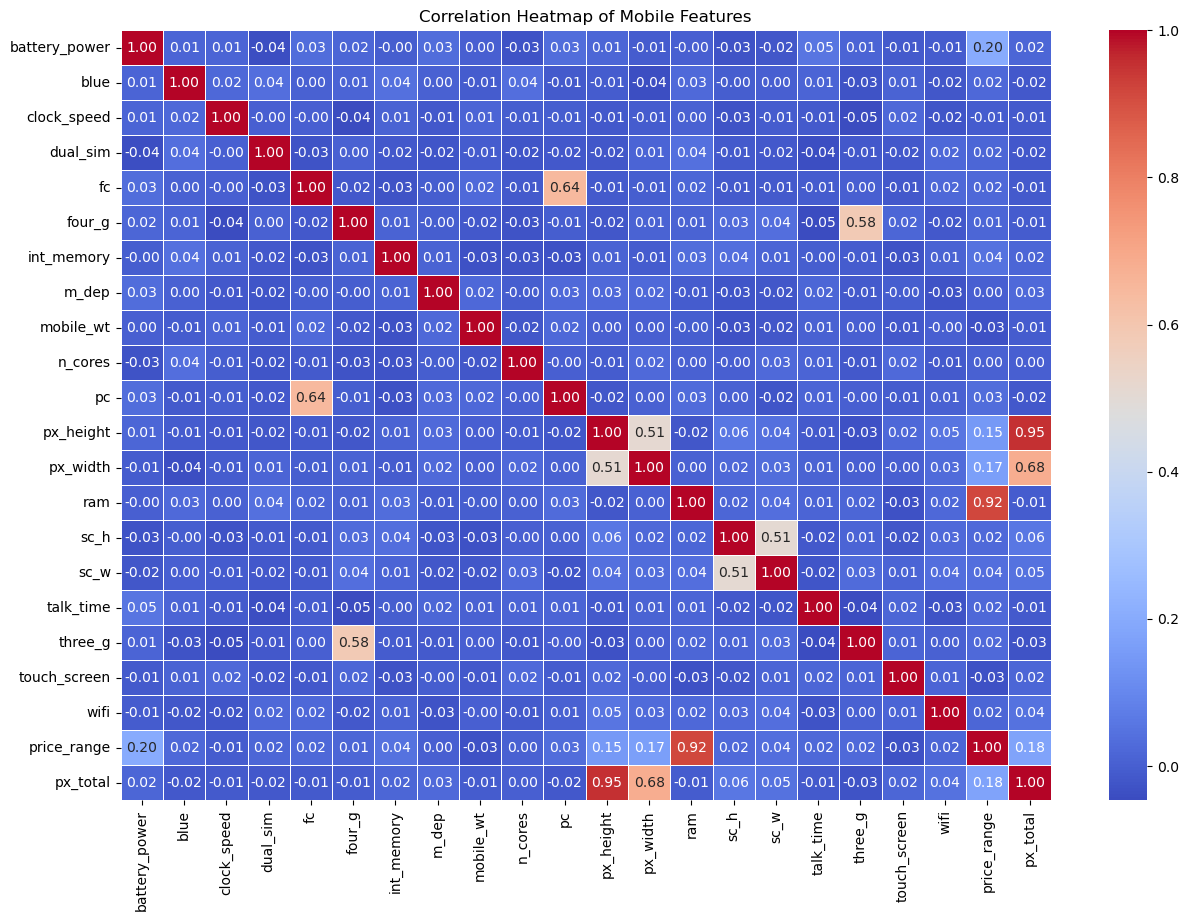

In [75]:
corr_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Mobile Features')
plt.show()

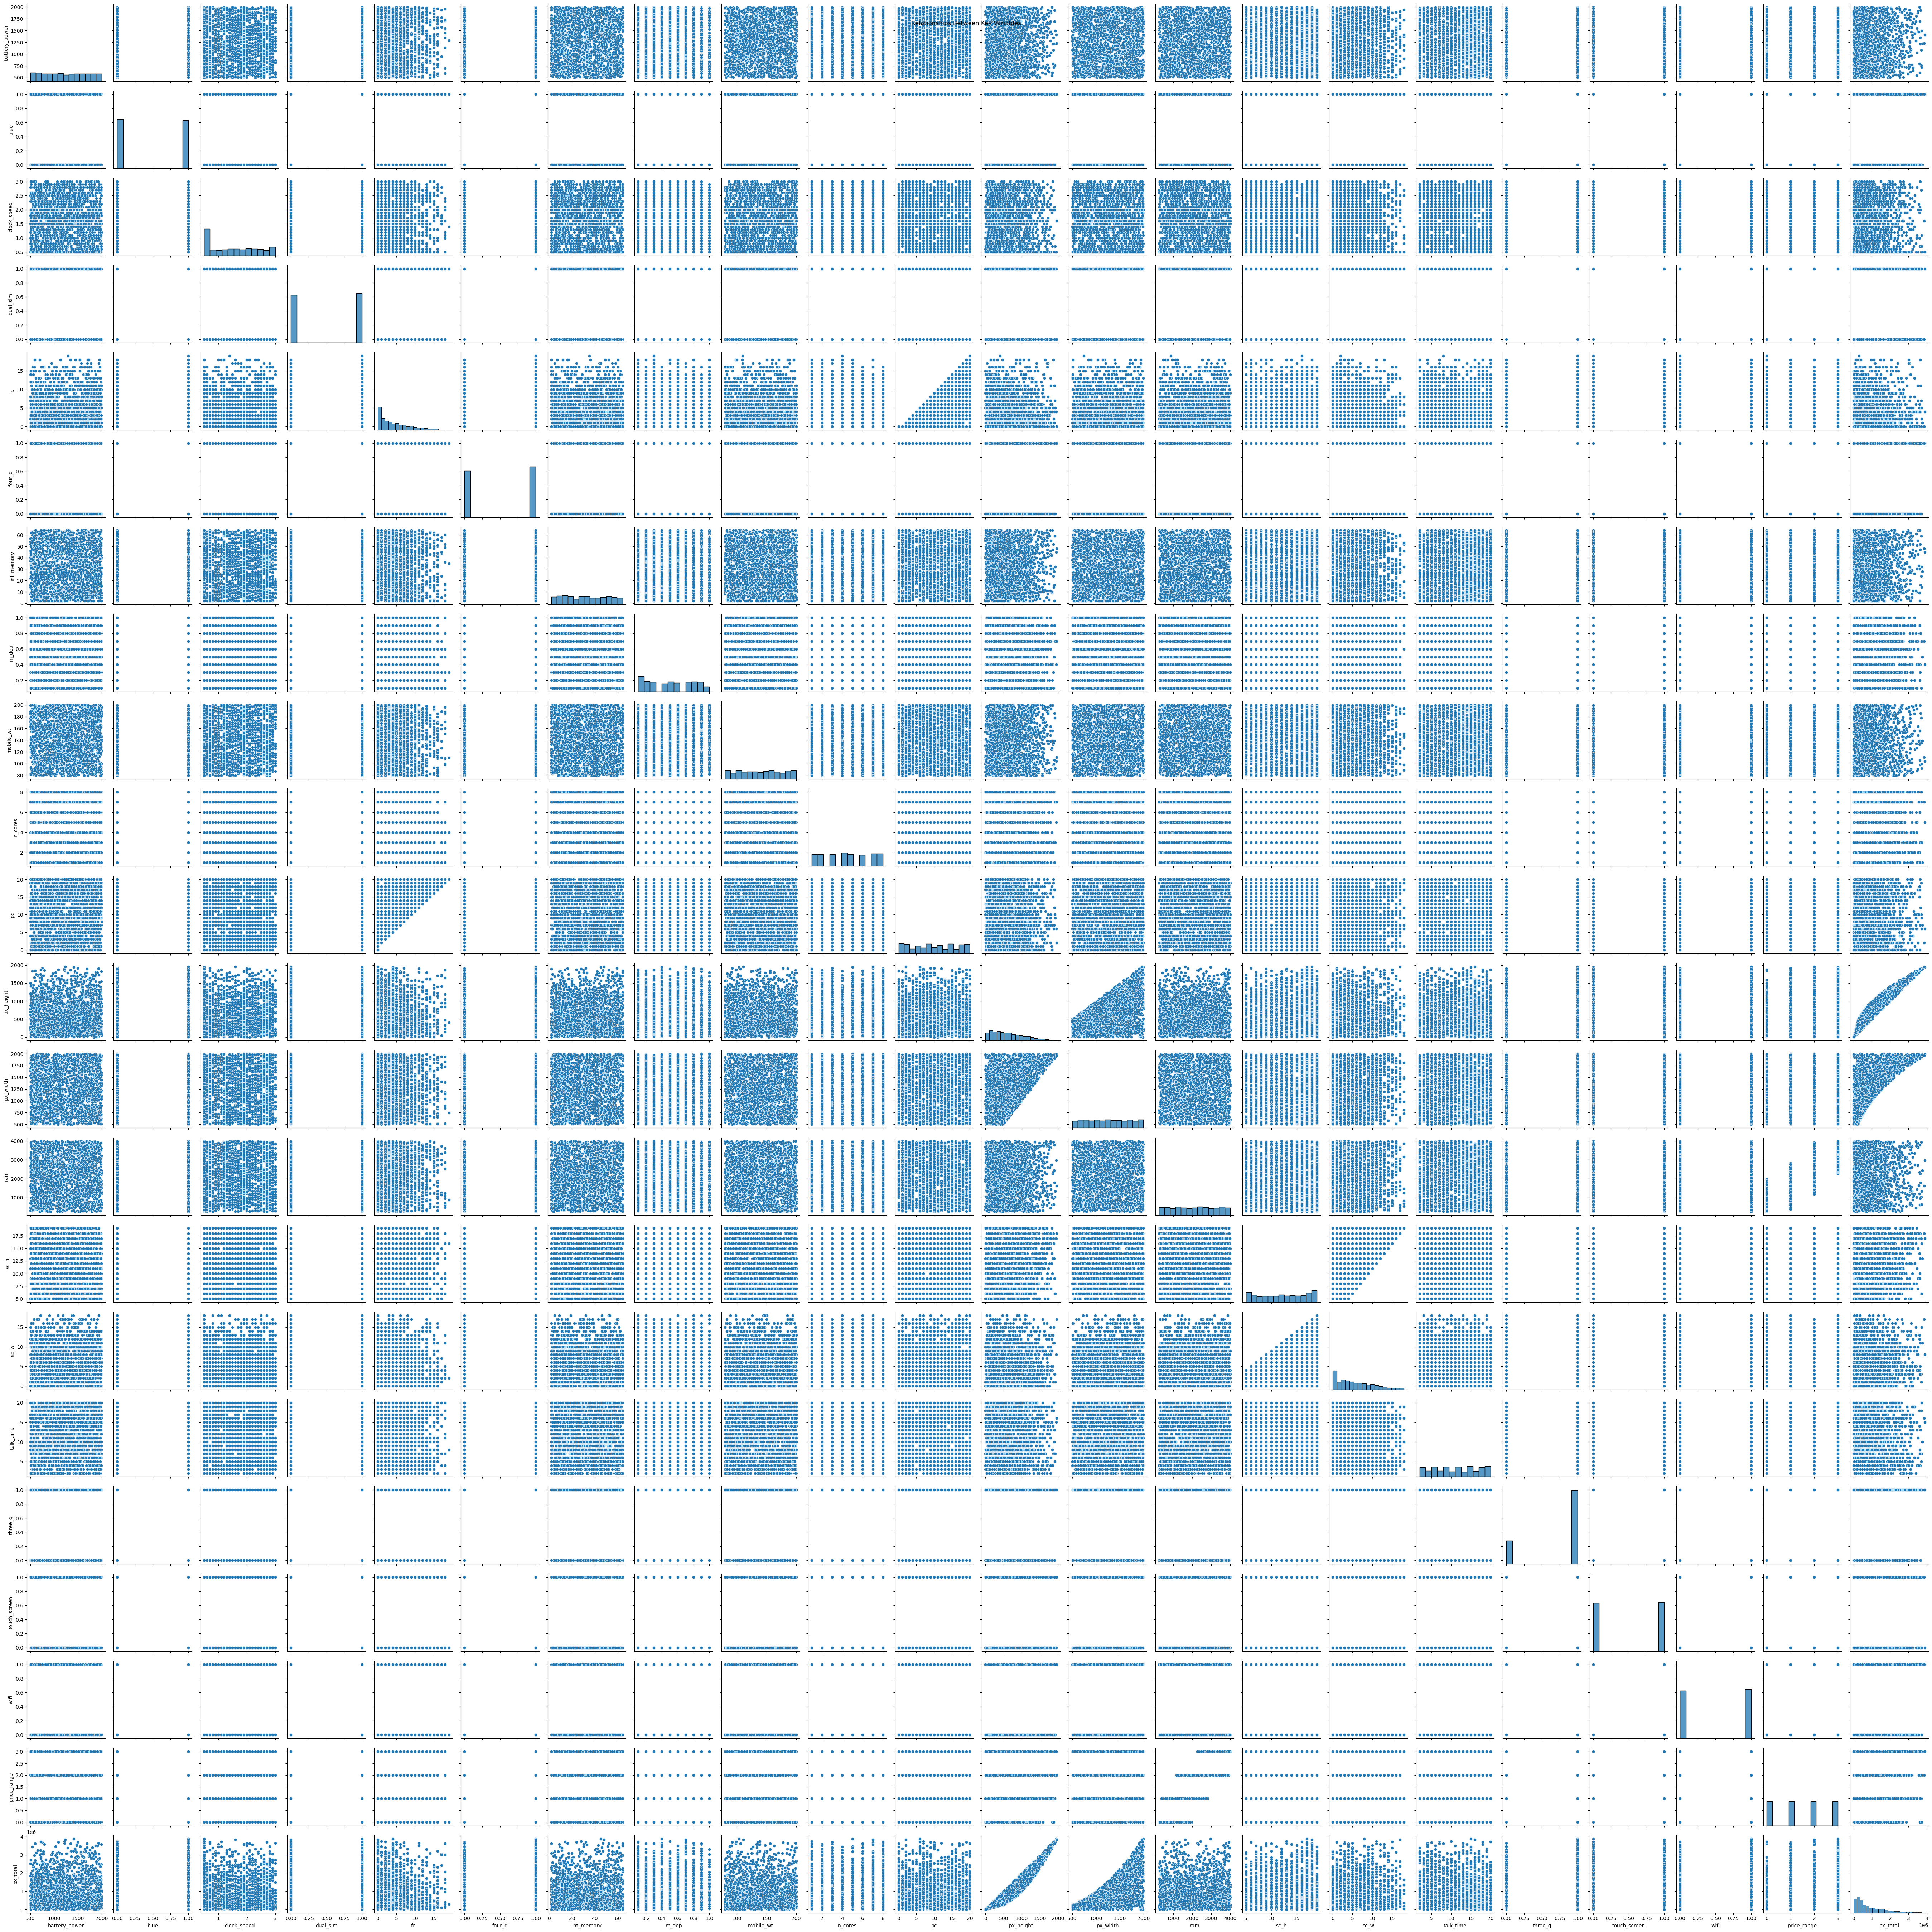

In [78]:
sns.pairplot(df)
plt.suptitle("Relationships Between Key Variables")
plt.show()